In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price ($)')

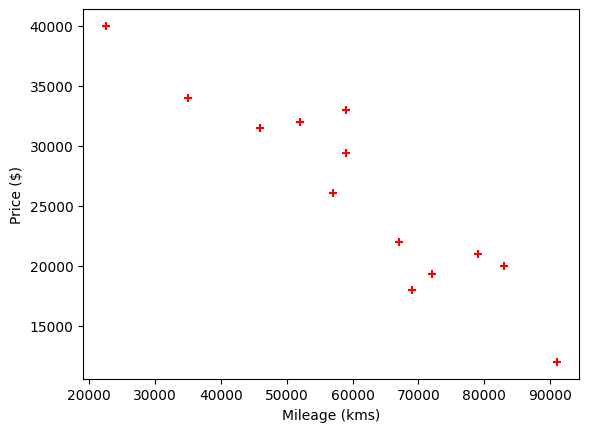

In [19]:
plt.scatter(df.Mileage,df['Sell Price($)'], color = 'red', marker = '+')
plt.xlabel('Mileage (kms)')
plt.ylabel('Price ($)')

In [5]:
dv = pd.get_dummies(df['Car Model'], dtype=int)
dv

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
dv = dv.drop('Mercedez Benz C class', axis='columns')
dv

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [7]:
merged = pd.concat([df,dv], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,BMW X5,69000,18000,6,0,1
1,BMW X5,35000,34000,3,0,1
2,BMW X5,57000,26100,5,0,1
3,BMW X5,22500,40000,2,0,1
4,BMW X5,46000,31500,4,0,1
5,Audi A5,59000,29400,5,1,0
6,Audi A5,52000,32000,5,1,0
7,Audi A5,72000,19300,6,1,0
8,Audi A5,91000,12000,8,1,0
9,Mercedez Benz C class,67000,22000,6,0,0


In [8]:
final = merged.drop('Car Model', axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [9]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [14]:
model.intercept_

np.float64(58976.625968537235)

    Predict the price of the Marcedez Benz that is 4 years old with mileage 45000 

In [15]:
model.predict([[45000,4,0,0]])

C:\Users\alokk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

    Predict the price of the BMW X5 that is 7 years old with mileage 86000

In [16]:
model.predict([[86000,7,0,1]])

C:\Users\alokk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

    Accuracy of the Model

In [17]:
model.score(X,y)

0.9417050937281082

    One-Hot Encoding

In [51]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [65]:
encoded = ohe.fit_transform(df[['Car Model']])
encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [72]:
encoded_cols = ohe.get_feature_names_out(['Car Model'])
encoded_cols

array(['Car Model_0', 'Car Model_1', 'Car Model_2'], dtype=object)

In [73]:
df_encoded = pd.DataFrame(encoded, columns=encoded_cols)
df_encoded

,Car Model_0,Car Model_1,Car Model_2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [75]:
df_final = pd.concat([df,df_encoded] , axis='columns')
df_final

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_0,Car Model_1,Car Model_2
0,1,69000,18000,6,0.0,1.0,0.0
1,1,35000,34000,3,0.0,1.0,0.0
2,1,57000,26100,5,0.0,1.0,0.0
3,1,22500,40000,2,0.0,1.0,0.0
4,1,46000,31500,4,0.0,1.0,0.0
5,0,59000,29400,5,1.0,0.0,0.0
6,0,52000,32000,5,1.0,0.0,0.0
7,0,72000,19300,6,1.0,0.0,0.0
8,0,91000,12000,8,1.0,0.0,0.0
9,2,67000,22000,6,0.0,0.0,1.0


In [76]:
df_final = df_final.drop('Car Model', axis='columns')
df_final

,Mileage,Sell Price($),Age(yrs),Car Model_0,Car Model_1,Car Model_2
0,69000,18000,6,0.0,1.0,0.0
1,35000,34000,3,0.0,1.0,0.0
2,57000,26100,5,0.0,1.0,0.0
3,22500,40000,2,0.0,1.0,0.0
4,46000,31500,4,0.0,1.0,0.0
5,59000,29400,5,1.0,0.0,0.0
6,52000,32000,5,1.0,0.0,0.0
7,72000,19300,6,1.0,0.0,0.0
8,91000,12000,8,1.0,0.0,0.0
9,67000,22000,6,0.0,0.0,1.0


In [77]:
X = df_final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Car Model_0,Car Model_1,Car Model_2
0,69000,6,0.0,1.0,0.0
1,35000,3,0.0,1.0,0.0
2,57000,5,0.0,1.0,0.0
3,22500,2,0.0,1.0,0.0
4,46000,4,0.0,1.0,0.0
5,59000,5,1.0,0.0,0.0
6,52000,5,1.0,0.0,0.0
7,72000,6,1.0,0.0,0.0
8,91000,8,1.0,0.0,0.0
9,67000,6,0.0,0.0,1.0


In [78]:
y = df_final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
model.predict([[86000,7,0,1,0]])

C:\Users\alokk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])